### 📚 초급 딥러닝 미션: "퍼셉트론과 다층 퍼셉트론 직접 구현하기"


# 🎯 목표
- 퍼셉트론(perceptron) 모델을 직접 코딩하여 논리 연산(AND, OR, XOR)을 구현한다.
- 다층 퍼셉트론(MLP)을 직접 구현하고, XOR 문제를 해결한다.
- 활성화 함수(sigmoid, ReLU 등)를 직접 만든다.
- 가중치(weight)와 편향(bias)의 행렬 연산을 수작업으로 구현해본다.



## 📂 미션 구성



### Part 1. 퍼셉트론(Perceptron)으로 논리 게이트 구현

퍼셉트론 1개를 이용해 AND, OR 연산을 직접 구현합니다.  
퍼셉트론의 수식:  
$ y = \text{step}(w_1x_1 + w_2x_2 + b) $

**제시할 문제:**
- AND 게이트를 퍼셉트론으로 구현해보고, (0,0), (0,1), (1,0), (1,1) 입력에 대해 출력 결과를 확인하세요.
- OR 게이트도 같은 방식으로 구현하세요.


In [ ]:
# Perceptron AND OR
import numpy as np
def Perceptron (x,w,b):
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [ ]:
def AND (x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.7
    return Perceptron(x,w,b)

In [ ]:
def OR (x1,x2):
    x = np.array([x1,x2])
    w = np.array([0.5,0.5])
    b = -0.2
    return Perceptron(x,w,b)

In [ ]:
def NAND (x1,x2):
    x = np.array([x1,x2])
    w = np.array([-0.5,-0.5])
    b = 0.7
    return Perceptron(x,w,b)

In [ ]:
array = np.array([[0,0],[0,1],[1,0],[1,1]])
for i in range(len(array)):
    x1 = array[i][0]
    x2 = array[i][1]
    print("x1:",x1,"x2:",x2,"AND:",AND(x1,x2),"OR:",OR(x1,x2))

x1: 0 x2: 0 AND: 0 OR: 0
x1: 0 x2: 1 AND: 0 OR: 1
x1: 1 x2: 0 AND: 0 OR: 1
x1: 1 x2: 1 AND: 1 OR: 1



### Part 2. 다층 퍼셉트론(MLP)으로 XOR 문제 해결

XOR 문제는 단일 퍼셉트론으로 해결할 수 없습니다.  
2개의 은닉 뉴런(hidden neuron)을 가진 간단한 다층 퍼셉트론을 구현하세요.

구성:
- 입력층(2개) → 은닉층(2개 뉴런, 활성화 함수 사용) → 출력층(1개 뉴런, 활성화 함수 사용)

**힌트:**
- 은닉층에서는 ReLU, 출력층에서는 Sigmoid를 사용할 수 있습니다.


In [ ]:
import numpy as np

# ReLU 함수
def relu(x):
    return np.maximum(0, x)

# Sigmoid 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# XOR 함수
def XOR(x1, x2):
    # 1번째 층 (입력 → 은닉층)
    W1 = np.array([[1.0, 1.0], 
                   [1.0, 1.0]])    # 2개 뉴런
    b1 = np.array([0.0, -1.0])      # 편향
    x = np.array([x1, x2])
    z1 = np.dot(x, W1) + b1
    a1 = relu(z1)                  # 활성화 함수 적용
    
    # 2번째 층 (은닉층 → 출력층)
    W2 = np.array([1.0, -2.0])      # 출력 1개 뉴런
    b2 = -0.5
    z2 = np.dot(a1, W2) + b2
    y = sigmoid(z2)                # sigmoid로 확률 변환

    return int(y > 0.5)             # 0.5 초과면 1 출력

# 테스트
print("\nXOR 게이트 결과:")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(f"{x1}, {x2} => {XOR(x1, x2)}")



XOR 게이트 결과:
0, 0 => 0
0, 1 => 1
1, 0 => 1
1, 1 => 0



### Part 3. 활성화 함수 직접 구현하기

- Sigmoid 함수와 ReLU 함수를 직접 정의하세요.

수식:
- Sigmoid:  
$ \sigma(x) = \frac{1}{1 + e^{-x}} $
- ReLU:  
$ \text{ReLU}(x) = \max(0, x) $

**추가 문제:**
- Sigmoid와 ReLU를 각각 그래프로 시각화해서 차이를 설명해보세요.


In [ ]:
# Sigmoid function and ReLU
def sigmoid(x):
    return 1/(1+np.exp(-x))

def ReLU(x):
    return np.maximum(0,x)

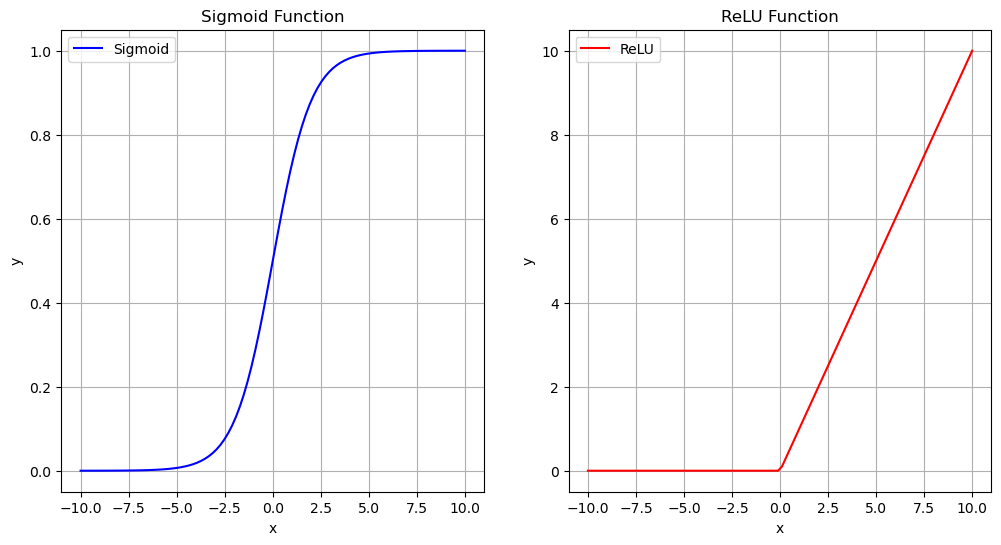

In [ ]:
# visualization
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x)
y_relu = np.maximum(0, x)

# 그래프 생성
plt.figure(figsize=(12, 6))

# Sigmoid 그래프
plt.subplot(1, 2, 1)
plt.plot(x, y_sigmoid, 'b-', label='Sigmoid')
plt.grid(True)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# ReLU 그래프 
plt.subplot(1, 2, 2)
plt.plot(x, y_relu, 'r-', label='ReLU')
plt.grid(True)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()




시그모이드와 ReLU 함수의 주요 차이점:

1. 출력 범위:
   - 시그모이드: 0에서 1 사이의 값으로 제한됨
   - ReLU: 0 이상의 모든 양수 값 가능

2. 기울기 특성:
   - 시그모이드: x가 큰 값이나 작은 값에서 기울기가 0에 가까워짐 (기울기 소실 문제)
   - ReLU: x > 0 인 영역에서 일정한 기울기 1을 유지

3. 계산 효율성:
   - 시그모이드: 지수 함수 계산이 필요해 상대적으로 복잡
   - ReLU: 단순 비교 연산으로 계산이 매우 빠름


### Part 4. 행렬 곱 연산으로 퍼셉트론 계산하기

- 2차원 입력 벡터와 가중치 행렬을 곱해서 퍼셉트론 출력을 계산하세요.
- 넘파이(Numpy)만 사용 가능합니다 (PyTorch, TensorFlow 사용 금지).

**포맷:**
- 입력 $X = [x_1, x_2]$
- 가중치 행렬 $W = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \end{bmatrix}$
- 편향 벡터 $b = [b_1, b_2]$

출력:  
$ y = \text{activation}(XW + b) $


In [ ]:
def activation(x, w, b):
    y = np.dot(x, w) + b 
    return y

x = np.array([0.5, 0.5])
w = np.array([[5.0, 7.0],
              [1.0, 1.0]])
b = np.array([-0.7, -0.2])

y = activation(x, w, b)
print("Output:", y)


Output: [2.3 3.8]



## ✅ 제출할 것
- 각각의 Part에 대해 코드와 출력 결과
- 그래프가 필요한 경우 (활성화 함수 그래프) 시각화 결과 포함
- 각 코드 블록 위에 간단한 설명 주석 추가



## ✨ 추가 보너스 과제 (선택)
- 은닉층 뉴런 수를 2개 이상으로 바꿔보고, XOR 문제 성능 변화를 관찰하세요.
- 시그모이드 대신 하이퍼볼릭 탄젠트 함수(tanh)를 사용해서 비교해보세요.



## 📋 체크리스트
| 체크 항목 | 완료 여부 |
|:---|:---:|
| 퍼셉트론으로 AND/OR 구현 | ⬜ |
| 다층 퍼셉트론으로 XOR 구현 | ⬜ |
| 활성화 함수(Sigmoid, ReLU) 직접 구현 | ⬜ |
| 가중치 행렬 연산으로 계산 | ⬜ |
| 결과 설명과 출력 포함 | ⬜ |
| (보너스) 은닉층 수 변화 실험 | ⬜ |
